In [1]:
#Setup modules autoreload
%load_ext autoreload
%autoreload 2

from types import SimpleNamespace

import numpy as np
from scipy import optimize

import pandas as pd 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt

plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"-"})
plt.rcParams.update({'font.size': 14})

# Import class from py file
from q1 import Worker
from q11 import *
from q11_copy import *

## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $(1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

In [2]:
model = Worker()
model.solve()

model2 = Worker1()
model3 = Worker2()

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[15.30165022719559, 15.529333310606443, 15.645070267213015, 15.715125570929828, 15.762086100436177, 15.79575568897165, 15.821077162802721, 15.840812778978425, 15.856627226919523, 15.869583501513466, 15.88039222029973, 15.889546461275645, 15.897399087739585, 15.90420928020416, 15.910171691216428, 15.915435350368737, 15.920116290828085, 15.924306202430122, 15.928078497429999, 15.931492648636892, 15.934597347974108, 15.937432843432825, 15.940032693394368, 15.942425101026478, 15.944633941523259, 15.946679561627114, 15.94857940822796, 15.950348527203015, 15.951999962707752, 15.953545079348977, 15.954993824074792, 15.956354940543223, 15.957636145734343, 15.95884427634298, 15.959985410817264, 15.961064971642298, 15.962087811501803, 15.963058286206428, 15.96398031670084, 15.964857442011159, 15.96569286464031, 15.96648948963883, 15.967249958355799, 15.967976677696235, 15.96867184556774, 15.969337473083197, 15.969975403991926, 15.97058733173471, 15.971174814454892, 15.97173928824577, 15.97228207

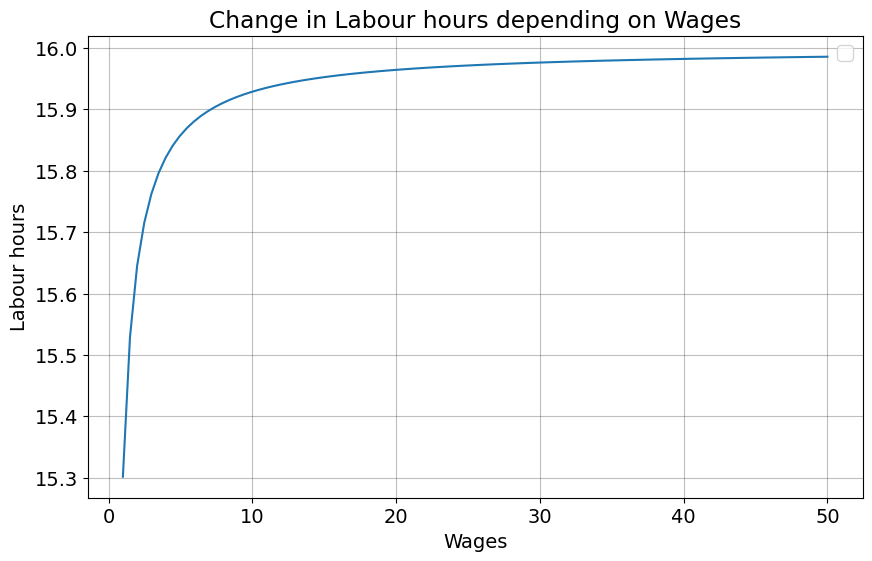

In [3]:
w_vector = np.linspace(1,50,100)
l_vector = []
for i in w_vector:
    model.par.omega = i
    model.solve()
    l_vector.append(model.par.el)

print(l_vector)

plt.figure(figsize=(10, 6))
plt.plot(w_vector, l_vector)
plt.xlabel('Wages')
plt.ylabel('Labour hours')
plt.title('Change in Labour hours depending on Wages')
plt.legend()
plt.show()



We see that labours converges close to 16 hours with a wage 50. The hours does not increase much when increasing the wages above 35. 


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


In [4]:
G_vector = []
l_vector = []
u_vector = []
tau_vector = []

G_vector, l_vector, u_vector, tau_vector = model2.solve()

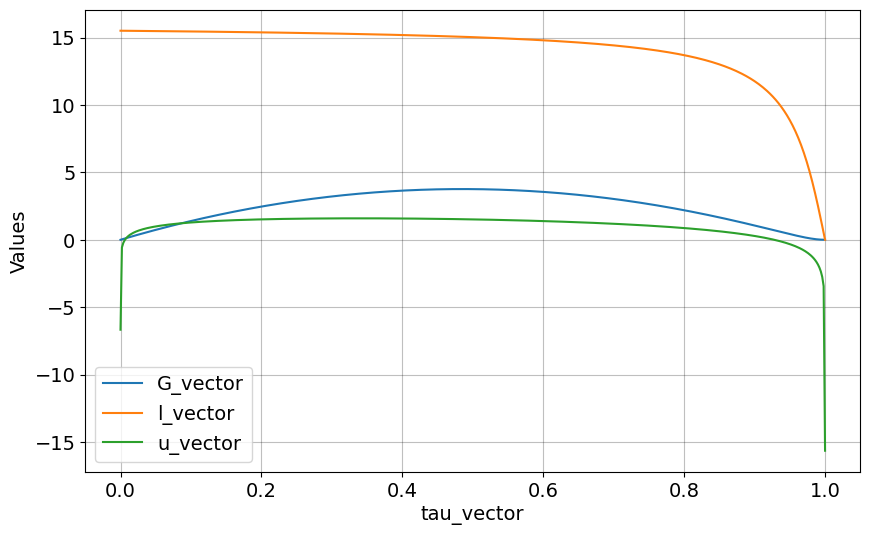

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(tau_vector, G_vector, label='G_vector')
plt.plot(tau_vector, l_vector, label='l_vector')
plt.plot(tau_vector, u_vector, label='u_vector')
plt.xlabel('tau_vector')
plt.ylabel('Values')
plt.legend()
plt.show()

**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

The most optimat tax is: 0.33868, with utility of: 1.59026


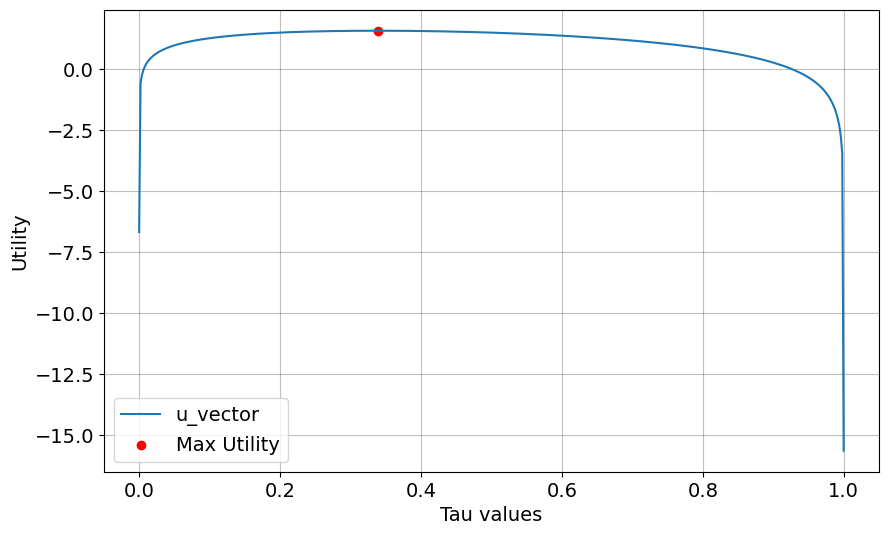

In [6]:
max_index = np.argmax(u_vector)
optimal_tax = tau_vector[max_index]
max_utility = max(u_vector)

print(f'The most optimat tax is: {optimal_tax:6.5f}, with utility of: {max_utility:6.5f}')

plt.figure(figsize=(10, 6))
plt.plot(tau_vector, u_vector, label='u_vector')
plt.scatter(optimal_tax, max_utility, color='red', label='Max Utility')  # Add a dot at the maximum value
plt.xlabel('Tau values')
plt.ylabel('Utility')
plt.legend()
plt.show()


A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{\sigma-1} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

In [7]:
G_vector2 = []
l_vector2 = []
u_vector2 = []
tau_vector2 = []

G_vector2, l_vector2, u_vector2, tau_vector2 = model3.solve()


5.219988958810768


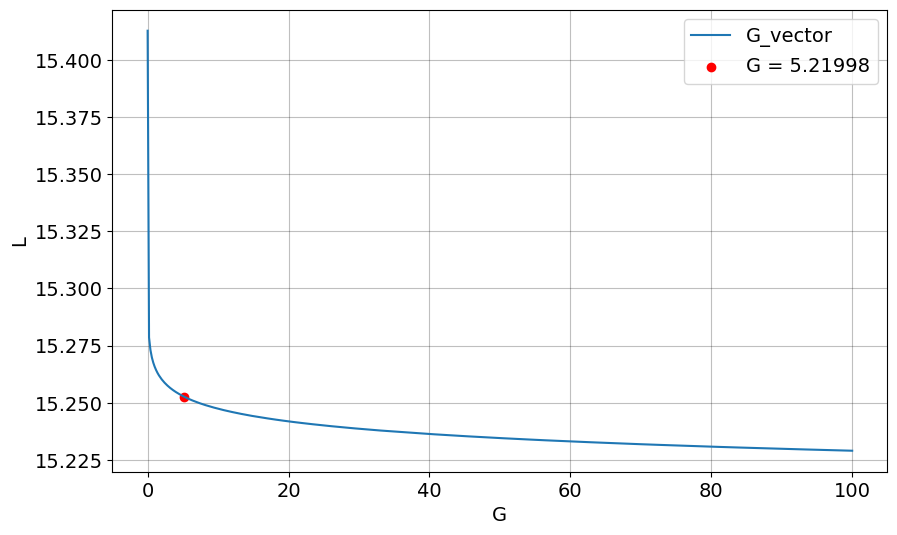

In [19]:
#To find G
the_G = model3.par.tau * model3.par.omega * max(l_vector2)

print(the_G)

# Find the index where G is closest to the desired value
idx = np.abs(G_vector2 - the_G).argmin()

plt.figure(figsize=(10, 6))
plt.plot(G_vector2, l_vector2, label='G_vector')
plt.xlabel('G')
plt.ylabel('L')
plt.scatter(G_vector2[idx], l_vector2[idx], color='red', label='G = 5.21998')  # Add a dot at G = 5.21998
#plt.ylim(0, 16)
plt.legend()
plt.show()

**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.